# Mobile-App Success Prediction Model

# **Business Understanding**
This project addresses the real-world problem of low app ratings, which can hinder app visibility and success in the competitive app market. By developing a machine learning model to classify app ratings into Low, Medium, and High categories based on features such as category, size, installs, and content rating, the project provides valuable insights for app developers, marketers, and investors. These stakeholders can leverage the model's findings to make informed decisions about app design, marketing strategies, and resource allocation, ultimately enhancing user satisfaction and driving app success. The implications of this project empower stakeholders to adopt data-driven approaches that positively impact their apps' performance in a crowded marketplace.



# **Data Understanding**

## Dataset Overview

The dataset used in this project consists of various apps available on the Google Play Store. It includes several key attributes that provide insights into the apps' characteristics and user engagement. The dataset includes the following columns:

- **App**: The name of the application.
- **Category**: The category under which the app is classified (e.g., Art & Design).
- **Rating**: The average user rating of the app (out of 5).
- **Reviews**: The number of user reviews submitted for the app.
- **Size**: The size of the app file (in megabytes).
- **Installs**: The total number of times the app has been installed.
- **Type**: Indicates whether the app is free or paid.
- **Price**: The price of the app (if applicable).
- **Content Rating**: The age group for which the app is suitable (e.g., Everyone, Teen).
- **Genres**: The specific genres associated with the app (e.g., Art & Design; Creativity).
- **Last Updated**: The date when the app was last updated.
- **Current Ver**: The current version of the app available in the store.
- **Android Ver**: The minimum Android version required to run the app.

## Key Features

1. **App**: This feature identifies each application in the dataset and is crucial for understanding the context of the data.
  
2. **Category**: The category provides insight into the type of app, which can influence user expectations and engagement.

3. **Rating**: This numeric feature is the target variable for our classification task, indicating user satisfaction and quality perception.

4. **Reviews**: The number of reviews can serve as a proxy for an app's popularity and user engagement.

5. **Size**: The size of the app may affect user download decisions, especially for users with limited storage.

6. **Installs**: This feature indicates the app's popularity and market reach, providing context for its rating.

7. **Type and Price**: These features distinguish between free and paid apps, which can influence user acquisition and engagement strategies.

8. **Content Rating**: This indicates the appropriate audience for the app, impacting marketing strategies and user targeting.

9. **Genres**: The genres associated with the app provide additional context for user preferences and can inform feature engineering.

10. **Last Updated**: This feature indicates how frequently the app is maintained, which can affect user trust and satisfaction.

11. **Current Ver and Android Ver**: These features provide insights into the app's version history and compatibility, which are essential for assessing technical aspects.


# **Data Exploration**
In this section, we will preprocess and explore the dataset to prepare it for modeling while gaining a deeper understanding of its features

In [ ]:
# abdi doing
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# reading the dataset
df = pd.read_csv("data.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# checking for missing values
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [ ]:
# handling the missing values
df.fillna({
    "Rating": df["Rating"].mean(),
    "Android Ver": df["Android Ver"].mode()[0],
    "Current Ver": df["Current Ver"].mode()[0],
    "Genres": df["Genres"].mode()[0],
    "Type": df["Type"].mode()[0],
    "Content Rating": "unknown"
}, inplace=True)


In [ ]:
df.isna().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


Handling duplicates

In [ ]:
df.duplicated().sum()

483

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Converting Data types

In [ ]:
#veona doing
#convert 'Reviews' to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors= 'coerce')
print(df['Reviews'].isna().sum())

1


In [ ]:

# Function to convert size to kilobytes
def size_to_kb(size):
    if 'M' in size:
        return float(size.replace('M', '')) * 1024  # Convert MB to KB
    elif 'k' in size:
        return float(size.replace('k', ''))  # Already in KB
    else:
        return None  # Handle cases where size is not provided

# Convert Size to KB
df['Size (KB)'] = df['Size'].apply(size_to_kb)

# Define bins and labels
bins = [0, 1024, 10240, 51200, 102400, float('inf')]
labels = ['Very Small', 'Small', 'Medium', 'Large', 'Very Large']

# Create Size Category
df['Size Category'] = pd.cut(df['Size (KB)'], bins=bins, labels=labels)

# Set Size Category for "Varies with device"
df['Size Category'] = df['Size Category'].cat.add_categories(['Varies'])
df.loc[df['Size'] == 'Varies with device', 'Size Category'] = 'Varies'

# Convert Size Category to categorical data type
df['Size Category'] = df['Size Category'].astype('category')

# Display the updated DataFrame
print(df[['Size', 'Size (KB)', 'Size Category']])


                     Size  Size (KB) Size Category
0                     19M    19456.0        Medium
1                     14M    14336.0        Medium
2                    8.7M     8908.8         Small
3                     25M    25600.0        Medium
4                    2.8M     2867.2         Small
...                   ...        ...           ...
10836                 53M    54272.0         Large
10837                3.6M     3686.4         Small
10838                9.5M     9728.0         Small
10839  Varies with device        NaN        Varies
10840                 19M    19456.0        Medium

[10358 rows x 3 columns]


In [ ]:
#convert 'Installs' to numeric
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '')

df['Installs'] = pd.to_numeric(df['Installs'], errors= 'coerce')

#delete null values
df.dropna(subset=['Installs'], inplace=True)
df['Installs'].isna().sum()

0

In [ ]:
# Remove '$' in 'Price' and convert to float
df['Price'] = df['Price'].str.replace('$', '')

df['Price'] = pd.to_numeric(df['Price'], errors= 'coerce')

In [ ]:
#Convert 'Last Updated' to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df['Last Updated'].dtype

<ipython-input-14-f6333d8128d7>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')


dtype('<M8[ns]')

In [ ]:

df['Year'] = df['Last Updated'].dt.year

# Preview the new column
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size (KB),Size Category,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19456.0,Medium,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14336.0,Medium,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8908.8,Small,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25600.0,Medium,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2867.2,Small,2018


In [ ]:
# Combine '0' and 'Free' into 'Free'
df['Type'] = df['Type'].replace({'0': 'Free', 'Free': 'Free'})
print(df['Type'].unique())


['Free' 'Paid']


In [ ]:
df['Size'].value_counts()

,count
Size,
Varies with device,1526
11M,188
13M,186
12M,186
14M,182
...,...
430k,1
429k,1
200k,1


In [ ]:
df["Type"].value_counts()

,count
Type,
Free,9592
Paid,765


# Exploratory Data Analysis

Univariate Analysis

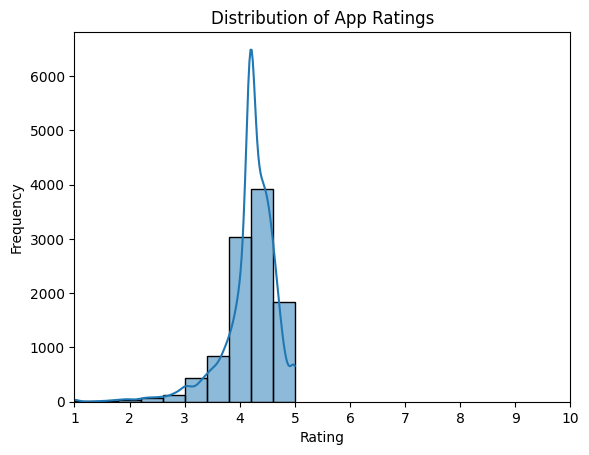

In [ ]:
#Distribution of App Ratings

sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xlim(1,10)
plt.show()


From the above visualization the ratings appear to be right-skewed (positively skewed). This suggests that most apps have ratings concentrated towards the higher range, around 4.0.

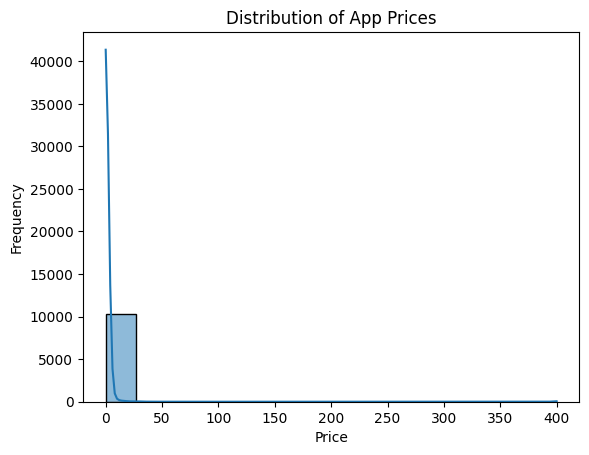

In [ ]:
#Distribution of App Prices
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of App Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The distribution of app prices is highly skewed to the right, with the majority of apps priced at 0 or very low values.
Free apps dominate the market, as indicated by the tall bar at the price of 0.

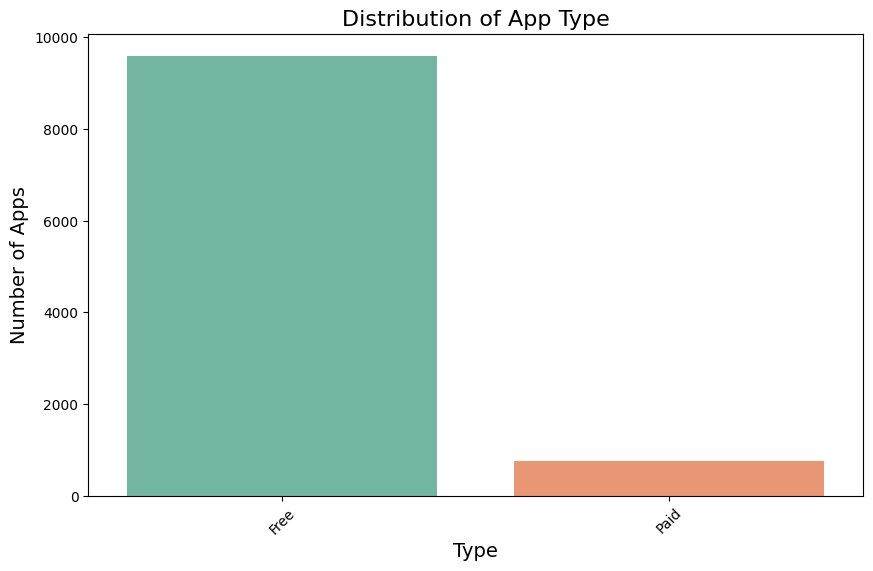

In [ ]:
#Distribution of App Types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type', hue= 'Type', palette='Set2')
plt.title('Distribution of App Type', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Number of Apps', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


The majority of the apps are free, with significantly more apps in the "free" category than the "paid" category.
This suggests that most developers or companies prefer offering apps for free, possibly with in-app purchases or ads, which might reflect current market trends.

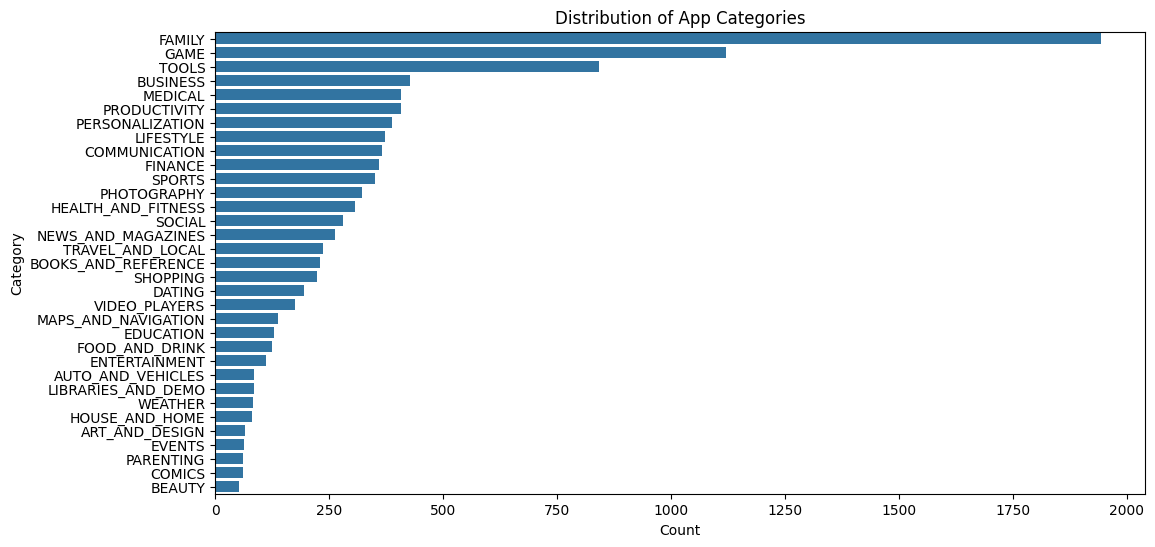

In [ ]:
#Distribution of app categories
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Distribution of App Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

Some of the most populated categories include Family, Games, and Tools, indicating these categories dominate the app market.
Categories such as Events, Parenting, and Art & Design have fewer apps, possibly reflecting niche audiences or specialized needs.

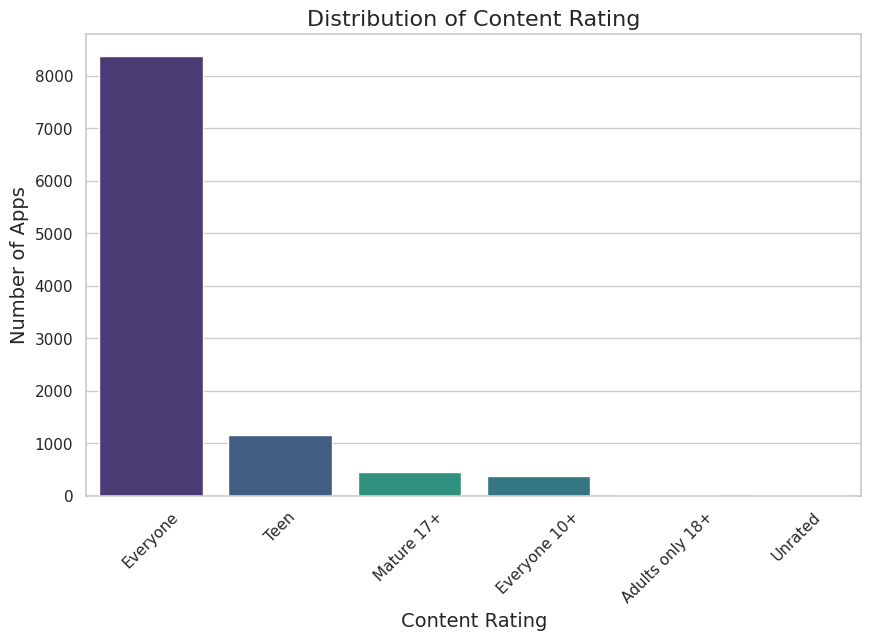

In [ ]:
# Distribution of content rating

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Content Rating', order=df['Content Rating'].value_counts().index, hue= 'Content Rating', palette='viridis')
plt.title('Distribution of Content Rating', fontsize=16)
plt.xlabel('Content Rating', fontsize=14)
plt.ylabel('Number of Apps', fontsize=14)
plt.xticks(rotation=45)
plt.show()

The majority of apps are rated "Everyone", meaning they are suitable for all age groups.
Other ratings, such as Teen and Mature 17+, appear in smaller proportions, likely indicating these apps are targeted at specific audiences (e.g., teens or adults).

Bivariate Analysis

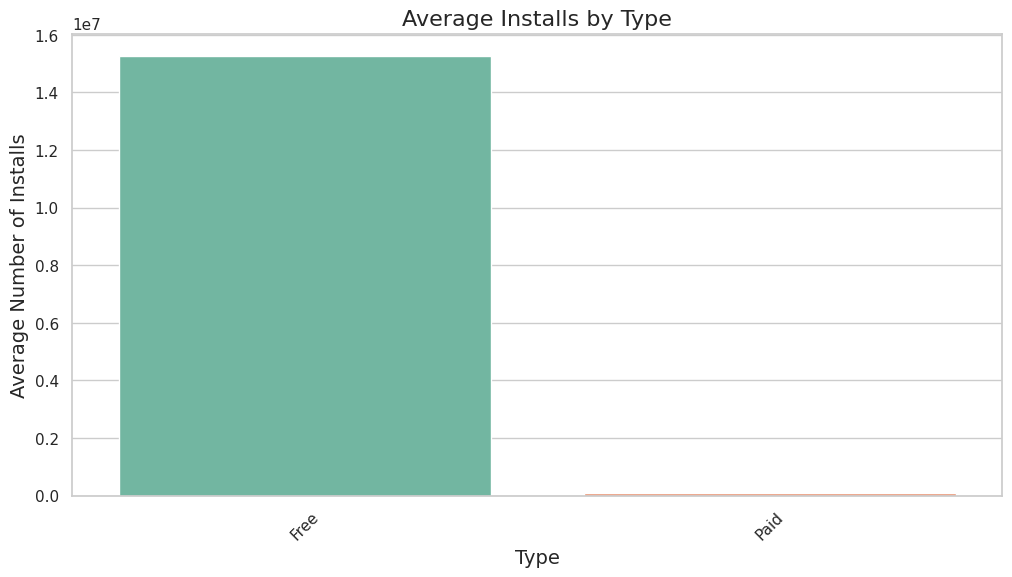

In [ ]:
#Type vs Installs

installs_mean = df.groupby('Type')['Installs'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=installs_mean, x='Type', y='Installs', hue='Type', palette='Set2')
plt.title('Average Installs by Type', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Average Number of Installs', fontsize=14)
plt.xticks(rotation=45)
plt.show()


Free apps generally have a higher average number of installs compared to paid apps.
This reinforces the idea that free apps attract a larger audience, as users are more inclined to download apps that are free of cost. This could also hint at the importance of accessibility in driving app adoption.


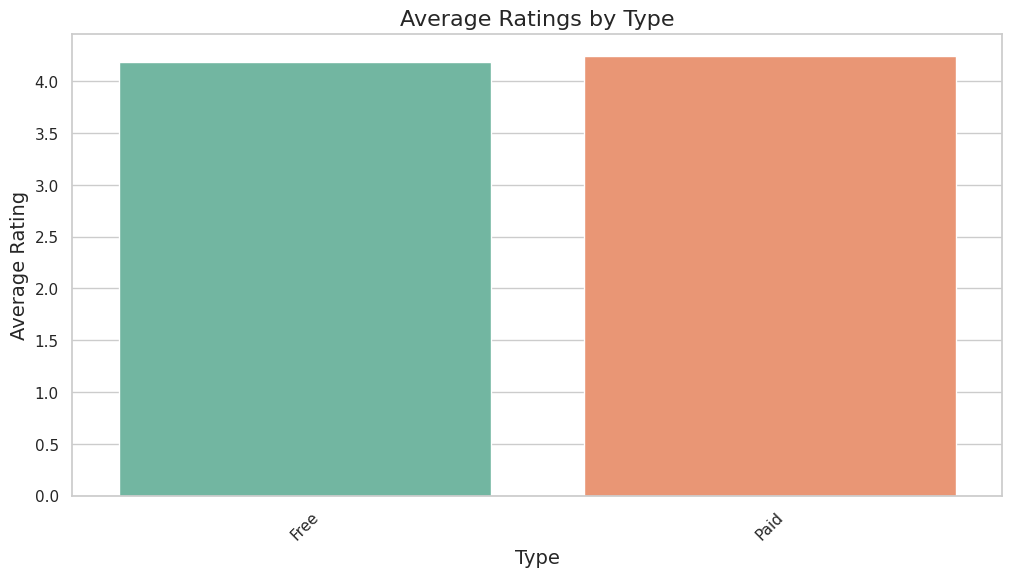

In [ ]:
#Types vs Ratings
ratings_mean = df.groupby('Type')['Rating'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=ratings_mean, x='Type', y='Rating', hue='Type', palette='Set2')
plt.title('Average Ratings by Type', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45)
plt.show()



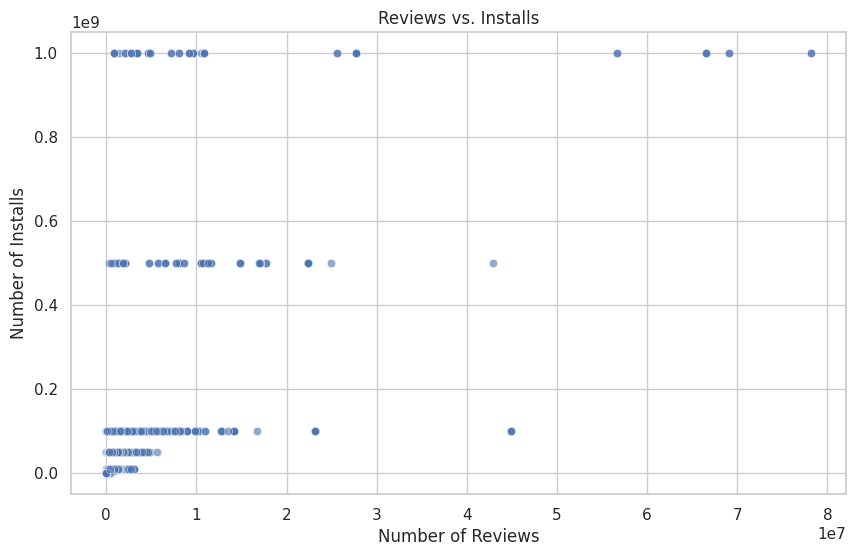

In [ ]:
# Plotting Reviews vs Installs
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Reviews', y='Installs', alpha=0.6)

# Adding labels and title
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Installs")
plt.title("Reviews vs. Installs")

plt.show()

The scatter plot shows relationship between Reviews and install From the scatter plot there is a Positive Correlation: There appears to be a positive trend where apps with more installs tend to have more reviews, which is expected since more installs typically result in more users leaving feedback.
Clustered Points: Most data points are clustered toward the lower end of both axes, suggesting that the majority of apps have a relatively low number of installs and reviews.
Outliers: A few apps have high install numbers and reviews, which likely represent popular apps with a large user base

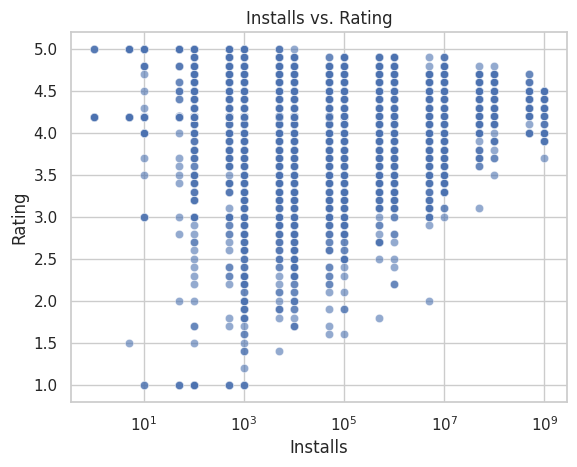

In [ ]:
# No. of installs vs Ratings

sns.scatterplot(data=df, x='Installs', y='Rating', alpha=0.6)
plt.title('Installs vs. Rating')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.xscale('log')
plt.show()

No Strong Correlation: The ratings remain fairly consistent (between 3.0 and 5.0) across various levels of installs, indicating that install count does not significantly affect an app’s average rating.


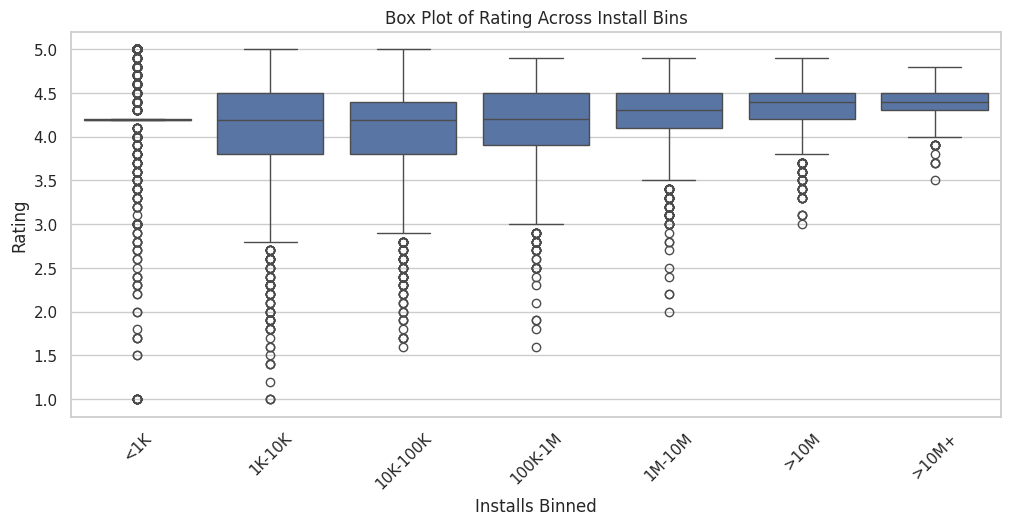

In [ ]:
# Define the bins and labels correctly
bins = [0, 1000, 10000, 100000, 1000000, 10000000, 100000000, np.inf]
labels = ['<1K', '1K-10K', '10K-100K', '100K-1M', '1M-10M', '>10M', '>10M+']

# Create the binned column
df['Installs Binned'] = pd.cut(df['Installs'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Installs Binned', y='Rating')
plt.title("Box Plot of Rating Across Install Bins")
plt.xlabel("Installs Binned")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()


This box plot categorizes apps into bins based on their install count and shows the distribution of ratings within each bin.
Insights:
Median Ratings: The median ratings across install bins are generally above 4, showing that apps in each install range tend to have relatively high ratings.
Variance in Low-Install Bins: The bins with lower installs (leftmost) show greater variance in ratings, with a larger number of outliers. This suggests that less popular apps experience more variability in user satisfaction.
Consistency in High-Install Bins: Higher install bins (rightmost) exhibit tighter distributions with fewer outliers, indicating that apps with more installs tend to have more consistent, high ratings. This could imply that well-established, widely installed apps maintain quality and receive more uniform feedback from users.


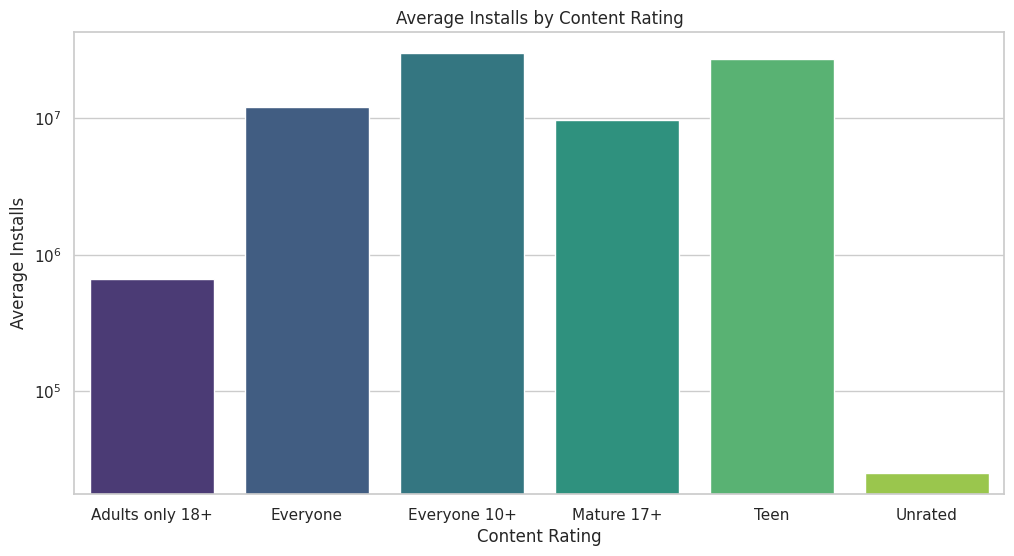

In [ ]:
# Average Installs by Content Rating
avg_installs = df.groupby('Content Rating')['Installs'].mean().reset_index()

# Plot a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_installs, x='Content Rating', y='Installs', hue='Content Rating', palette='viridis')
plt.title('Average Installs by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Average Installs')
plt.yscale('log')
plt.show()

Teen and Everyone 10+ apps are the most popular – These categories have the highest average installs, indicating that apps targeted at teens and younger users perform exceptionally well.

General audience apps (Everyone) also attract large installs, though slightly lower than the Teen category.

Apps with age restrictions (Mature 17+ and Adults only 18+) have fewer installs, likely due to smaller target audiences.

Unrated apps perform poorly, suggesting users may avoid them due to trust or content concerns.

Content ratings significantly influence app adoption, with broader audience categories (like Teen and Everyone 10+) leading in downloads.


# Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df2= df.copy()

In [ ]:

# Define bins and labels
bins = [0, 1000, 10000, 100000, float('inf')]
install_categories = ['Very Low', 'Low', 'Medium', 'High']

# Apply binning
df2['Binned_Installs'] = pd.cut(df2['Installs'], bins=bins, labels=install_categories, right=False)

label_encoder = LabelEncoder()
df2['Binned_Installs'] = label_encoder.fit_transform(df2['Binned_Installs'])

# Encode other categorical columns if needed
df2['Type'] = label_encoder.fit_transform(df2['Type'])
for col in ['Category', 'Content Rating', 'Size Category']:
    df2[col] = label_encoder.fit_transform(df2[col])

# Display the updated DataFrame
df2.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size (KB),Size Category,Year,Installs Binned,Binned_Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159.0,19M,10000.0,0,0.0,1,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19456.0,1,2018,10K-100K,2
1,Coloring book moana,0,3.9,967.0,14M,500000.0,0,0.0,1,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14336.0,1,2018,100K-1M,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510.0,8.7M,5000000.0,0,0.0,1,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8908.8,2,2018,1M-10M,0
3,Sketch - Draw & Paint,0,4.5,215644.0,25M,50000000.0,0,0.0,4,Art & Design,2018-06-08,Varies with device,4.2 and up,25600.0,1,2018,>10M,0
4,Pixel Draw - Number Art Coloring Book,0,4.3,967.0,2.8M,100000.0,0,0.0,1,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2867.2,2,2018,100K-1M,0


In [ ]:
#Check encoder categories in Binned_Installs
label_encoder.classes_

array(['Large', 'Medium', 'Small', 'Varies', 'Very Small'], dtype=object)

In [ ]:
# Specify the columns you want to drop
columns_to_drop = ['App', 'Current Ver', 'Last Updated', 'Android Ver', 'Genres', 'Size (KB)', 'Size', 'Year', 'Installs Binned']

# Drop the specified columns
df_cleaned = df2.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(df_cleaned.head())


   Category  Rating   Reviews    Installs  Type  Price  Content Rating  \
0         0     4.1     159.0     10000.0     0    0.0               1   
1         0     3.9     967.0    500000.0     0    0.0               1   
2         0     4.7   87510.0   5000000.0     0    0.0               1   
3         0     4.5  215644.0  50000000.0     0    0.0               4   
4         0     4.3     967.0    100000.0     0    0.0               1   

   Size Category  Binned_Installs  
0              1                2  
1              1                0  
2              2                0  
3              1                0  
4              2                0  


In [ ]:
df_cleaned['Binned_Installs'].value_counts()


,count
Binned_Installs,
0,5700
3,1791
2,1507
1,1359


([0, 1, 2, 3],
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

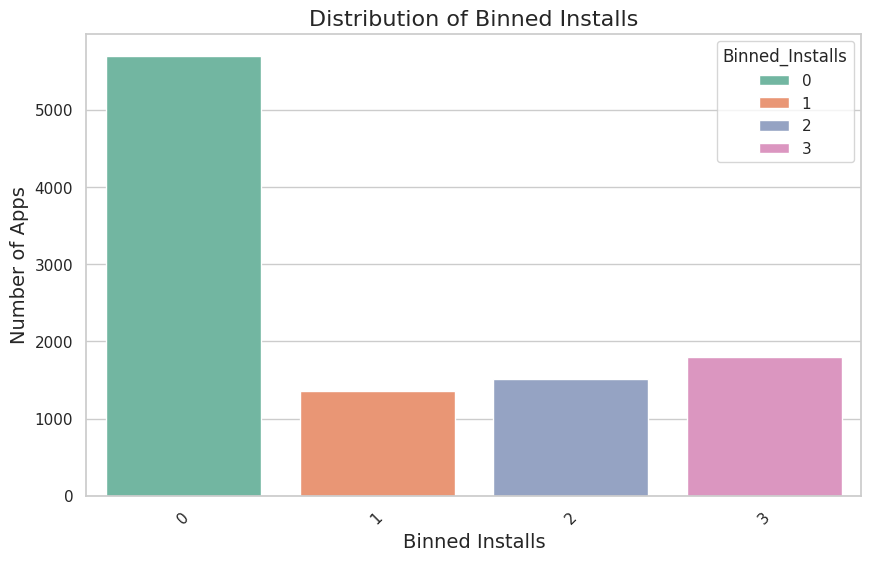

In [ ]:
#Distribution of Binned Installs
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Binned_Installs', hue= 'Binned_Installs', palette='Set2')
plt.title('Distribution of Binned Installs', fontsize=16)
plt.xlabel('Binned Installs', fontsize=14)
plt.ylabel('Number of Apps', fontsize=14)
plt.xticks(rotation=45)

In [ ]:
from sklearn.model_selection import train_test_split

#Define features and target
X = df_cleaned.drop(columns= ['Binned_Installs'])
y = df_cleaned['Binned_Installs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8285, 8), (2072, 8), (8285,), (2072,))

# Modelling

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

Logistic Regression

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1116    1    0   23]
 [ 227    7    7   31]
 [ 266    2    5   29]
 [ 299   11    3   45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.98      0.73      1140
           1       0.33      0.03      0.05       272
           2       0.33      0.02      0.03       302
           3       0.35      0.13      0.19       358

    accuracy                           0.57      2072
   macro avg       0.40      0.29      0.25      2072
weighted avg       0.47      0.57      0.45      2072



Random Forest Classifier

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline

In [ ]:
# Addressing class imbalance
# Initiating SMOTE



pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state = 42)),
    ('classifier', RandomForestClassifier(random_state=42))
])
# Fit the model
pipeline.fit(X_train, y_train)
# Predict on the test set
y_pred = pipeline.predict(X_test)
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1140    0    0    0]
 [   0  272    0    0]
 [   0    0  302    0]
 [   0    0    0  358]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1140
           1       1.00      1.00      1.00       272
           2       1.00      1.00      1.00       302
           3       1.00      1.00      1.00       358

    accuracy                           1.00      2072
   macro avg       1.00      1.00      1.00      2072
weighted avg       1.00      1.00      1.00      2072



Support Vector Machines



In [ ]:
from sklearn.svm import SVC

In [ ]:
# Create a pipeline with StandardScaler, SMOTE, and Support Vector Classifier (SVC)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(probability=True, random_state=42))  # Enable probability estimates for ROC/AUC
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[622  46 124 348]
 [ 18  42  64 148]
 [ 33  35  79 155]
 [ 24  46  23 265]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.55      0.68      1140
           1       0.25      0.15      0.19       272
           2       0.27      0.26      0.27       302
           3       0.29      0.74      0.42       358

    accuracy                           0.49      2072
   macro avg       0.43      0.43      0.39      2072
weighted avg       0.61      0.49      0.51      2072

